# Random Walk on a Lattice with Random Traps

Consider a one-dimensional lattice $L$ with randomly distributed trap sites. Each lattice site can be in either of two states: with probability $\rho$ it is a trap site and with probability $1-\rho$ it is a nontrap site. Suppose a walker is placed at random at any nontrapping site and the walker can step to the right with probability $p$ and to the left with probability $1-p$. When the walker arrives at a trap site, it can no longer move.

We would like to obtain the following quantities by Monte Carlo simulation.

- The mean survival time, that is, the mean number of steps before a trap site is reached.
- The survival probability after $N$ steps, that is, the probability for the walker to survive a given number of steps.

In [1]:
%matplotlib inline

# ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt

# set font scale and style
plt.rcParams.update({'font.size': 18})

In [2]:
# import custom class
%run -i '../src/randomly_distributed_trap_1d.py'

## A. Trajectory

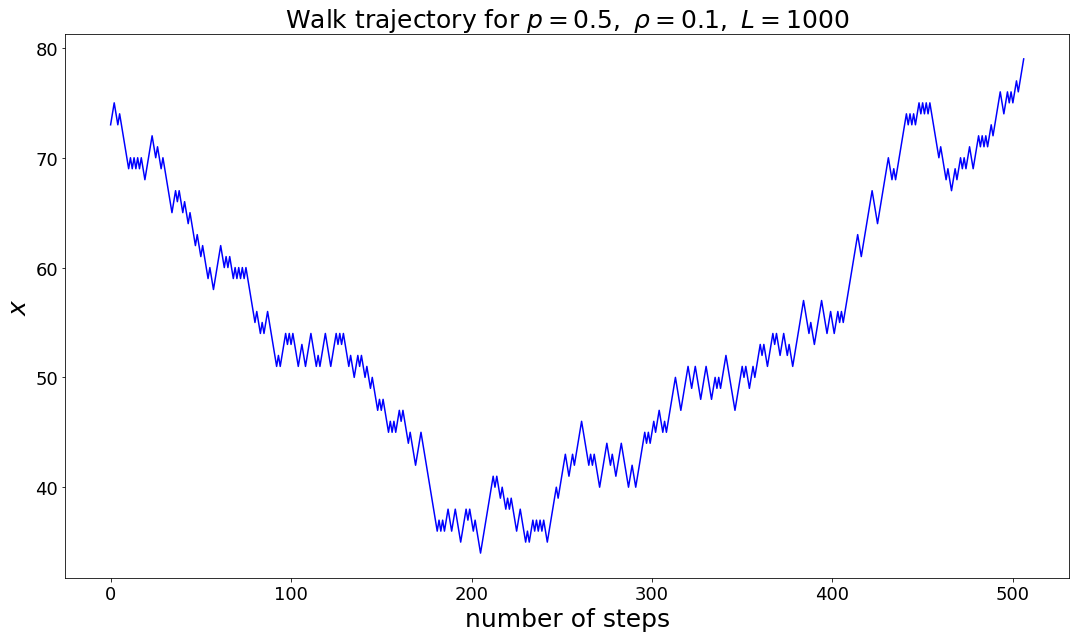

In [64]:
plt.subplots(figsize=(18, 10))

walk = RandomlyDistributedTrap(nsteps=10**4, ntrials=0, p=0.5, rho=0.1, L=1000)
traj, _ = walk.step_count_b4_trap()

plt.plot(range(len(traj)), traj, color='b')
plt.xlabel(r'number of steps', fontsize=25)
plt.ylabel(r'$x$', fontsize = 25)
plt.title(r'Walk trajectory for $p=0.5, ~ \rho=0.1, ~ L = 1000$', fontsize=25)
plt.show()

## B. Mean Survival Time ( Mean First Passage Time )

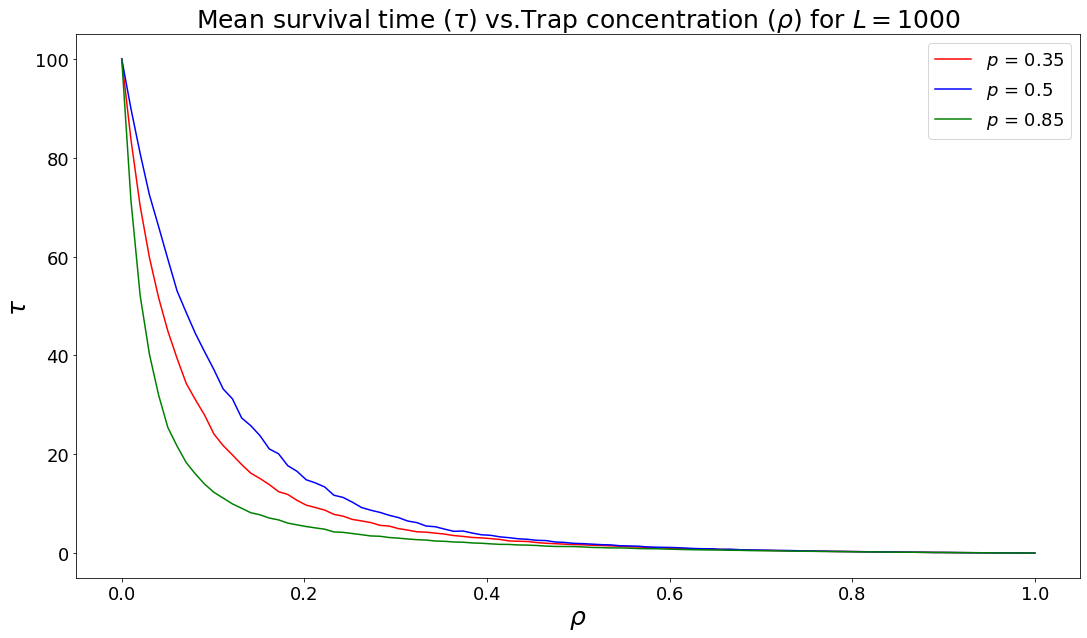

In [66]:
fig, ax = plt.subplots(figsize=(18,10)) # figure layout
rho = np.linspace(0,1,100) # trap concentration values
p = [0.35, 0.5, 0.85] # probability values
res = np.zeros((len(p), len(rho))) # result array
color = ['r', 'b', 'g'] # color codes

for i, pval in enumerate(p):
    for j, val in enumerate(rho):
        walk = RandomlyDistributedTrap(nsteps=10**2, ntrials=10**4, p=pval, rho=val, L=1000)
        res[i,j] = walk.average_nsteps_trap()
    ax.plot(rho, res[i,:], color=color[i], label=r'$p$ = {0:.2g}'.format(pval))
    
ax.set_xlabel(r'$\rho$', fontsize=25)
ax.set_ylabel(r'$\tau$', fontsize=25)
ax.legend(loc = 'best')
ax.set_title(r'Mean survival time ($\tau$) vs.Trap concentration ($\rho$) for $L=1000$',
             fontsize=25)
plt.savefig('../img/tfig1.png')
plt.savefig('../img/tfig1.pdf')
plt.show()

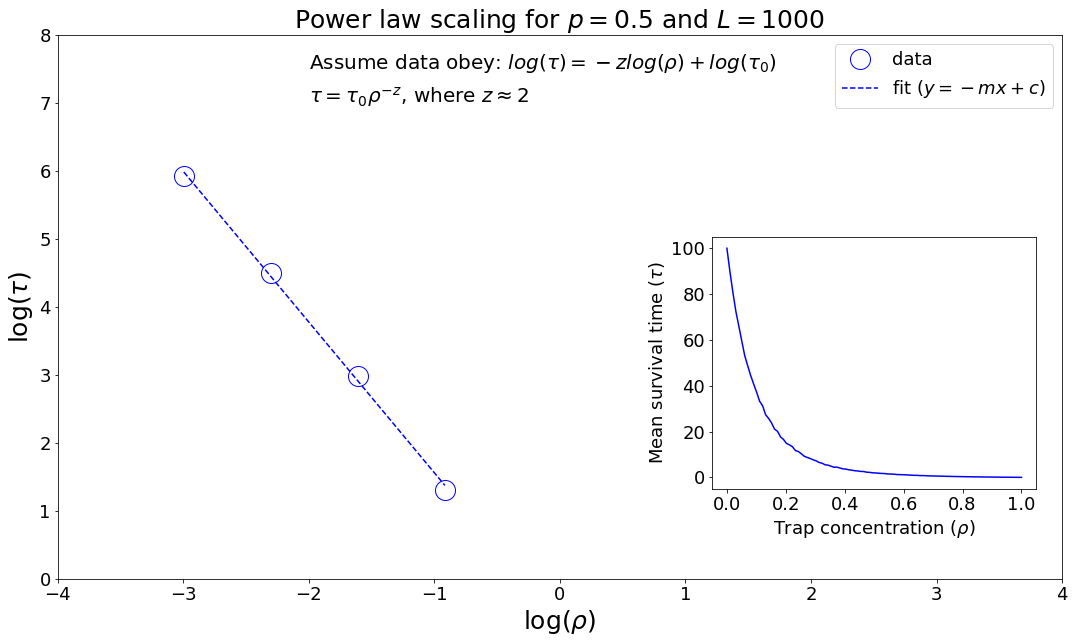

In [67]:
# figure layout
fig, ax1 = plt.subplots(figsize=(18,10))
left, bottom, width, height = [0.63,0.25,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

# extract few values for log-log plot
rho_values = [0.05, 0.1, 0.2, 0.4]
tau = np.zeros(len(rho_values))
for i, val in enumerate(rho_values):
    walk = RandomlyDistributedTrap(nsteps=10**4, ntrials=10**5, p=0.5, rho=val, L=1000)
    tau[i] = walk.average_nsteps_trap() 

# plot data
ax1.plot(np.log(rho_values), np.log(tau), color='b', marker='o',linestyle=" ", markersize=20,
         markerfacecolor='none', label='data')
ax2.plot(rho, res[1,:], color='b')

# fit data
m, c = np.polyfit(np.log(rho_values), np.log(tau), 1) # extract slope and intercept
ax1.plot(np.log(rho_values), -np.abs(m)*np.log(rho_values) + c,  color='b', linestyle="--",
         label=r'fit ($y = -mx + c$)')

ax1.set_xlim([-4,4])
ax1.set_ylim([0,8])
ax1.set_xlabel(r'log($\rho$)', fontsize=25)
ax1.set_ylabel(r'log($\tau$)', fontsize=25)
ax1.set_title(r'Power law scaling for $p=0.5$ and $L=1000$', fontsize=25)
ax1.text(-2,7.5, r'Assume data obey: $log(\tau) = -zlog(\rho) + log(\tau_0)$', fontsize=20)
ax1.text(-2, 7, r'$\tau = \tau_0 \rho^{-z}$, where $z \approx 2$', fontsize=20)
ax1.legend(loc = 'best')
ax2.set_xlabel(r'Trap concentration ($\rho$)')
ax2.set_ylabel(r'Mean survival time ($\tau$)')
plt.savefig('../img/tfig2.png')
plt.savefig('../img/tfig2.pdf')
plt.show()

# C. Mean Survival Probability

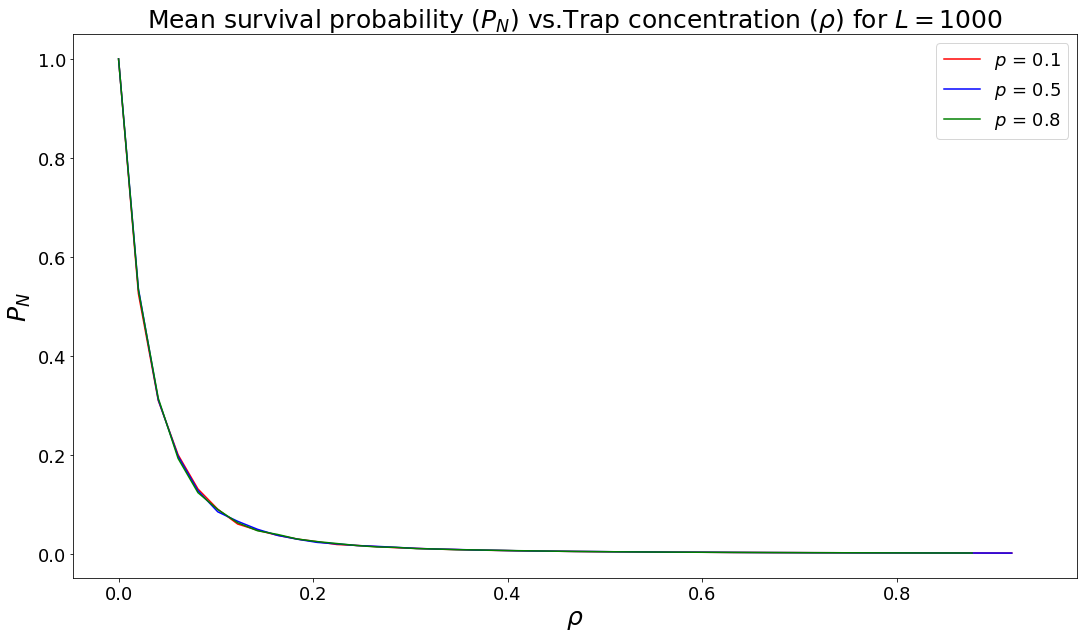

In [11]:
fig, ax = plt.subplots(figsize=(18,10)) # figure layout
rho = np.linspace(0,1,50) # trap concentration values
p = [0.1, 0.5, 0.8] # probability values
res = np.zeros((len(p), len(rho))) # result array
color = ['r', 'b', 'g'] # color codes

for i, pval in enumerate(p):
    for j, val in enumerate(rho):
        walk = RandomlyDistributedTrap(nsteps=10**3, ntrials=10**2, p=pval, rho=val, L=1000)
        res[i,j] = np.mean(walk.average_survival_proba())
    ax.plot(rho, res[i,:], color=color[i], label=r'$p$ = {0:.2g}'.format(pval))
    
ax.set_xlabel(r'$\rho$', fontsize=25)
ax.set_ylabel(r'$P_{N}$', fontsize = 25)
ax.set_title(r'Mean survival probability ($P_N$) vs.Trap concentration ($\rho$) for $L=1000$', 
             fontsize=25)
ax.legend(loc = 'best')
plt.savefig('../img/tfig3a.png')
plt.savefig('../img/tfig3a.pdf')
plt.show()

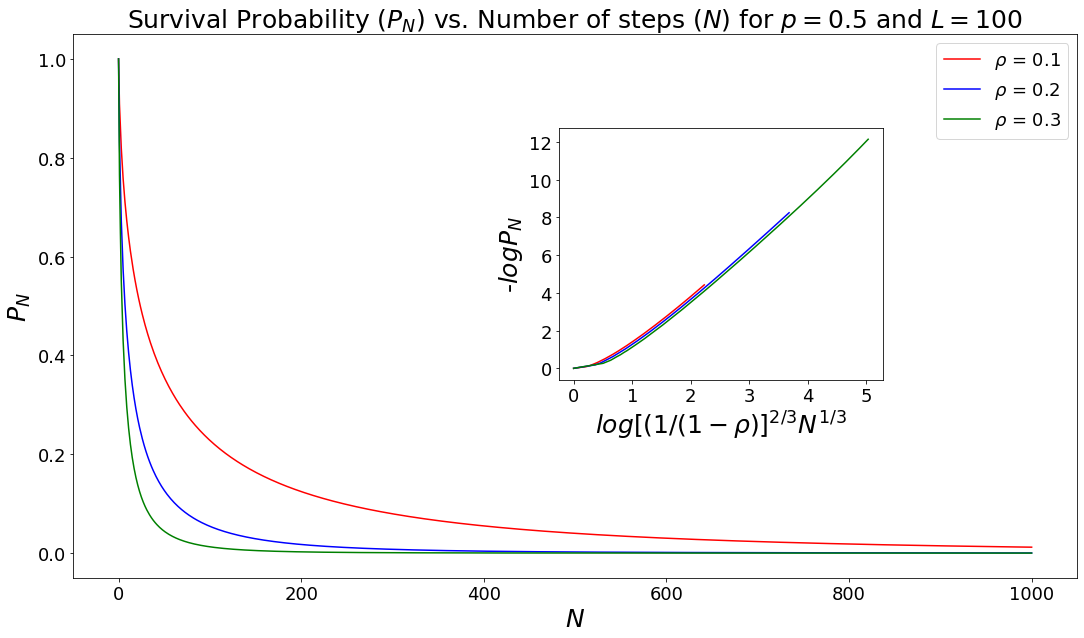

In [78]:
# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.5,0.4,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

rho = [0.1, 0.2, 0.3] # trap concentration values
color = ['r', 'b', 'g'] # color codes

for i, val in enumerate(rho):
    walk = RandomlyDistributedTrap(nsteps=10**3, ntrials=10**4, p=0.5, rho=val, L=100)
    avg_proba = walk.average_survival_proba()
    
    # plots
    n = np.arange(len(avg_proba))
    x = (n**(1/3))*(np.log(1/(1-rho[i])))**(2/3)      
    ax1.plot(n, avg_proba, color=color[i], label=r'$\rho$ = {0:.2g}'.format(val))   
    ax2.plot(x, -np.log(avg_proba), color=color[i])
    
ax1.set_xlabel(r'$N$', fontsize=25)
ax1.set_ylabel(r'$P_N$', fontsize = 25)
ax1.set_title(r'Survival Probability $(P_N)$ vs. Number of steps $(N)$ for $p=0.5$ and $L=100$', 
              fontsize=25)
ax1.legend(loc = 'best')
ax2.set_xlabel(r'$log[(1/(1-\rho)]^{2/3}N^{1/3}$', fontsize=25)
ax2.set_ylabel(r'-$log P_N$', fontsize = 25)
plt.savefig('../img/tfig3b.png')
plt.savefig('../img/tfig3b.pdf')
plt.show()

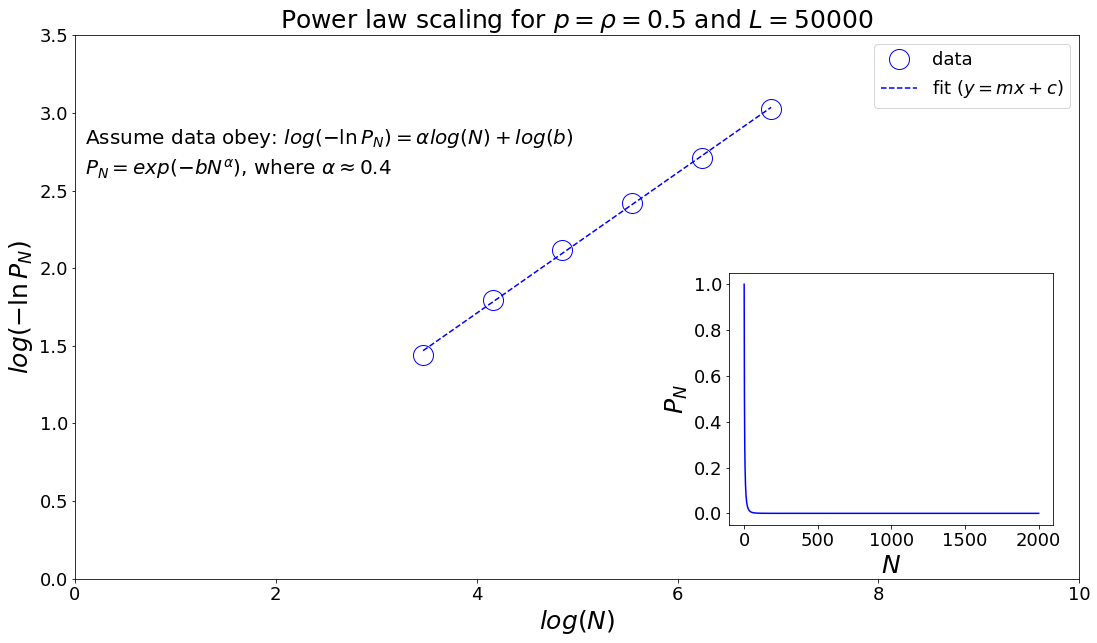

In [10]:
# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.63,0.2,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

# extract few values for log-log plot
walk = RandomlyDistributedTrap(nsteps=2*10**3, ntrials=10**2, p=0.5, rho=0.5, L=50000)
avg_proba = walk.average_survival_proba()

n = [32, 64, 128, 256, 512, 1024]
res = np.zeros(len(n))
for i, val in enumerate(n):
    res[i] = avg_proba[val]
    
# plot data
ax1.plot(np.log(n), np.log(-np.log(res)), color = 'b', marker = 'o',linestyle = " ", 
         markersize = 20, markerfacecolor = 'none', label = 'data')
ax2.plot(range(len(avg_proba)), avg_proba, color='b')

# fit data
m, c = np.polyfit(np.log(n), np.log(-np.log(res)), 1) # extract slope and intercept
ax1.plot(np.log(n), m*np.log(n) + c, color = 'b', linestyle = "--", label = r'fit ($y = mx + c$)')

ax1.set_xlim([0,10])
ax1.set_ylim([0,3.5])
ax1.text(0.1,2.8, r'Assume data obey: $log(-\ln P_N) = \alpha log(N) + log(b)$', fontsize = 20)
ax1.text(0.1, 2.6, r'$P_{N} = exp(-bN^{\alpha})$, where $\alpha \approx 0.4$', fontsize = 20)
ax1.set_xlabel(r'$log(N)$', fontsize=25)
ax1.set_ylabel(r'$log(-\ln P_{N})$', fontsize = 25)
ax1.set_title(r'Power law scaling for $p=\rho=0.5$ and $L=50000$', fontsize=25)
ax1.legend(loc = 'best')
ax2.set_xlabel(r'$N$', fontsize=25)
ax2.set_ylabel(r'$P_{N}$', fontsize = 25)
plt.savefig('../img/tfig4.png')
plt.savefig('../img/tfig4.pdf')
plt.show()